# Table of Contents

1. [Loading and visualizing datas](#1-bullet) <br>
    I - [Setting labels](#2-bullet) <br>
    II - [Displaying some examples of images per label](#3-bullet) <br>
    III - [Looking some transformations on images](#13-bullet) <br>
    <br>
    
2. [SIFT](#4-bullet) <br>
    I - [Determing and displaying SIFT descriptors](#5-bullet) <br>
    II - [Image preprocessing with SIFT](#6-bullet) <br>
    III - [Dimensionality reduction](#7-bullet) <br>
    IV - [Analysis of similarity](#8-bullet) <br>
    <br>

3. [CNN](#9-bullet) <br>
    I - [Creating features with VGG16](#10-bullet) <br>
    II - [Dimensionality reduction](#11-bullet) <br>
    III - [Analysis of similarity](#12-bullet) <br>
    <br>

# 1.Loading datas <a class="anchor" id="1-bullet"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir

from Functions import *

path = "D:/Big Data/Projet 6 OC/Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [2]:
data = pd.read_csv('raw_text_data.csv', sep=',')
pd.set_option('display.max_columns', 50)
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [3]:
data.shape

(1050, 15)

## I - Setting labels <a class="anchor" id="2-bullet"></a>

In [4]:
# Our target will be the primary category of each product, let's extract it

data['primary_category'] = data['product_category_tree'].apply(lambda p : p.replace('[', '').replace('"', '').split('>>')[0].strip())

In [5]:
data['primary_category'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [6]:
data.groupby(by='primary_category').count()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
primary_category,,,,,,,,,,,,,,,
Baby Care,150,150,150,150,150,150,149,149,150,150,150,150,150,134,150
Beauty and Personal Care,150,150,150,150,150,150,150,150,150,150,150,150,150,41,150
Computers,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
Home Decor & Festive Needs,150,150,150,150,150,150,150,150,150,150,150,150,150,148,149
Home Furnishing,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
Kitchen & Dining,150,150,150,150,150,150,150,150,150,150,150,150,150,79,150
Watches,150,150,150,150,150,150,150,150,150,150,150,150,150,10,150


## II - Displaying some examples of images per label <a class="anchor" id="3-bullet"></a>

Home Furnishing
-------


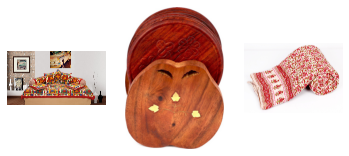

Baby Care
-------


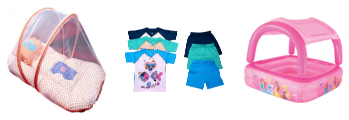

Watches
-------


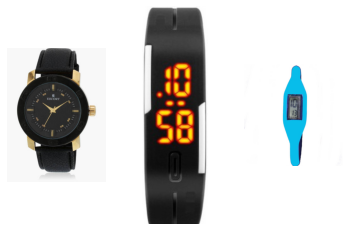

Home Decor & Festive Needs
-------


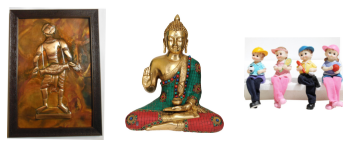

Kitchen & Dining
-------


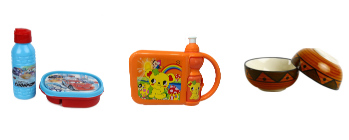

Beauty and Personal Care
-------


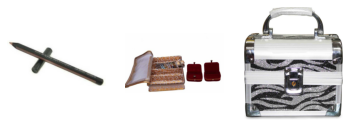

Computers
-------


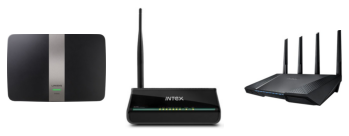

In [8]:
from matplotlib.image import imread

for name in data['primary_category'].unique():
    print(name)
    print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + data[data["primary_category"] == name]['image'].iloc[i+10]
        image = imread(filename)
        plt.axis('off')
        plt.imshow(image)
    plt.show()

## III - Looking some transformations on images <a class="anchor" id="13-bullet"></a>

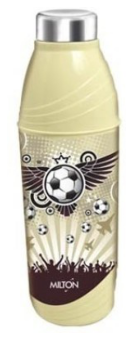

Category : Kitchen & Dining


In [60]:
import random
from PIL import Image


# Randomly select an image
img_number = random.randint(0,len(data['image']))
filename = path + data['image'].iloc[img_number]

# Loading and displaying image
img_init = Image.open(filename) 
display_img(img_init)
    
print("Category : {}".format(data['primary_category'].iloc[img_number]))

In [61]:
# Looking image characteristics

w, h = img_init.size
print("Width : {} px, height : {} px".format(w, h))
print("Pixels format : {}".format(img_init.mode))

mat = np.array(img_init)
print("Pixels matrix size : {}".format(mat.shape))

Width : 145 px, height : 400 px
Pixels format : RGB
Pixels matrix size : (400, 145, 3)


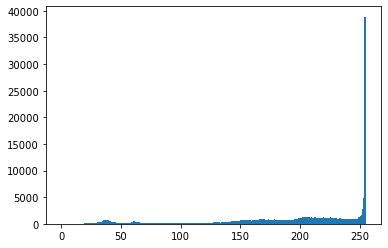

In [62]:
# Histogram of the image

n, bins, patches = plt.hist(mat.flatten(), bins=range(256))
plt.show()

### a. Histogram corrections

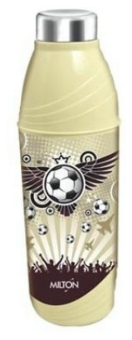

In [63]:
# Spreading histogram

from PIL import ImageOps

img_autocontrast = ImageOps.autocontrast(img_init)
display_img(img_autocontrast)

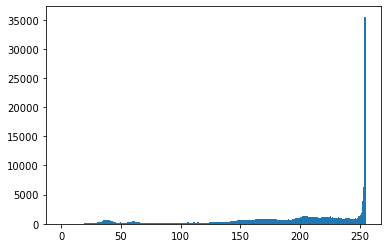

In [64]:
n, bins, patches = plt.hist(np.array(img_autocontrast).flatten(), bins=range(256))
plt.show()

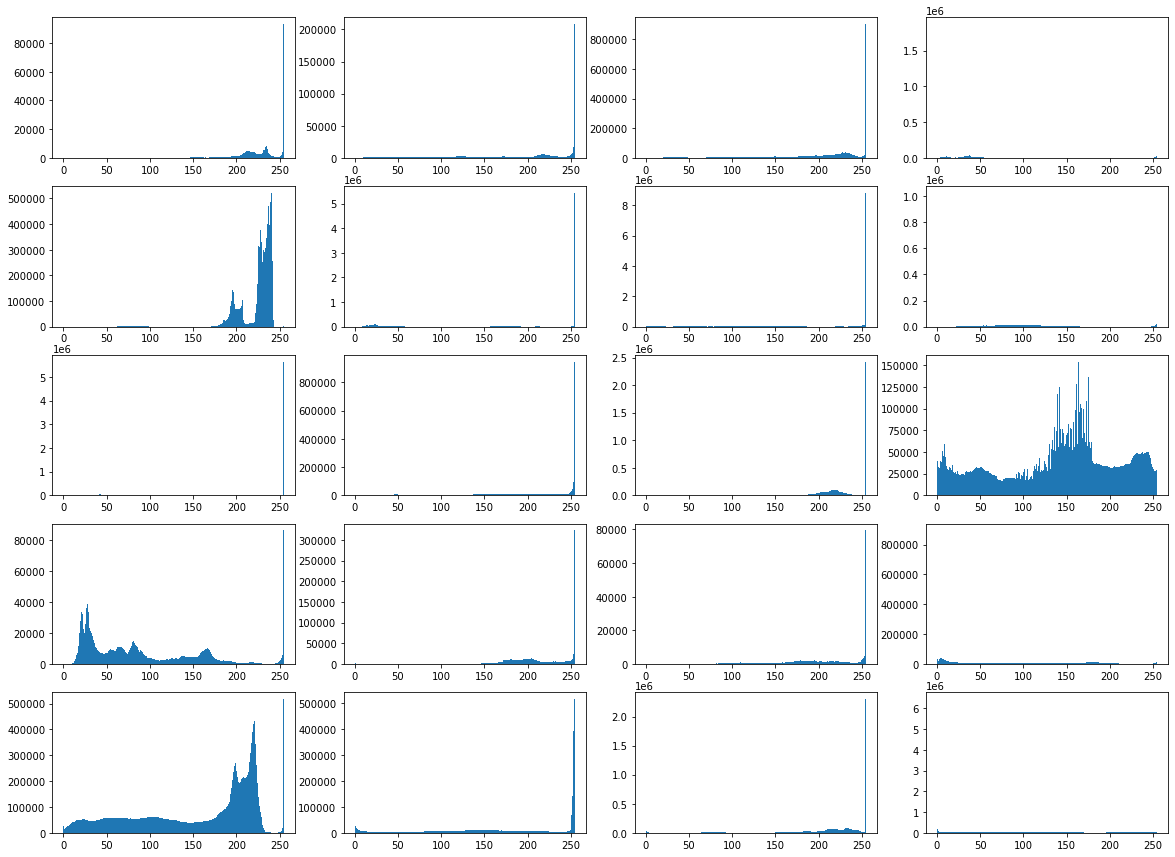

In [65]:
# Doesn't seem to have no issues of exposure on this image, let's look over more

plt.figure(figsize=(20,15))

for i in range(20):
    
    # Randomly select an image
    img_number = random.randint(0,len(data['image']))
    filename = path + data['image'].iloc[img_number]

    # Load
    img = Image.open(filename)
    mat = np.array(img)
    
    # Show
    plt.subplot(5,4,i+1)
    n, bins, patches = plt.hist(mat.flatten(), bins=range(256))
plt.show()

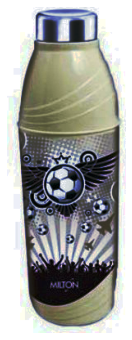

In [66]:
# Equalizing

img_equalize = ImageOps.equalize(img_init)
display_img(img_equalize)

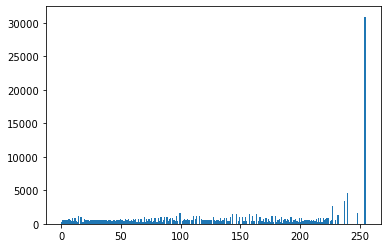

In [67]:
n, bins, patches = plt.hist(np.array(img_equalize).flatten(), bins=range(256))
plt.show()

### b. Filters

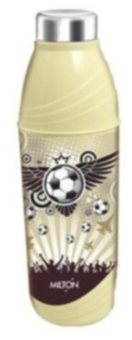

In [68]:
from PIL import ImageFilter

# Average filter

img_blur = img_init.filter(ImageFilter.BoxBlur(1))
display_img(img_blur)

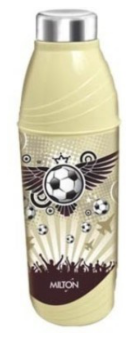

In [69]:
# Gaussian filter

img_gaussian = img_init.filter(ImageFilter.GaussianBlur(radius=0.5))
display_img(img_gaussian)

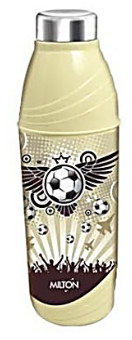

In [70]:
# UnsharpMask

img_unsharp = img_init.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))
display_img(img_unsharp)

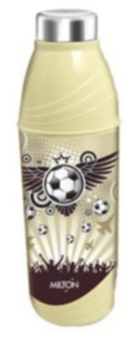

In [71]:
# Kernel

img_kernel = img_init.filter(ImageFilter.Kernel(size=(3,3), kernel=[1 for i in range(9)], scale=None, offset=0))
display_img(img_kernel)

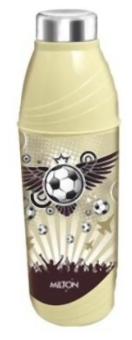

In [72]:
# Median

img_median = img_init.filter(ImageFilter.MedianFilter(size=3)) 
display_img(img_median)

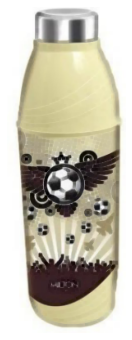

In [73]:
# Min

img_min = img_init.filter(ImageFilter.MinFilter(size=3))
display_img(img_min)

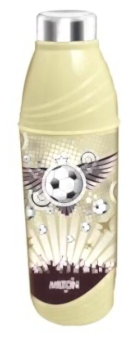

In [74]:
# Max

img_max = img_init.filter(ImageFilter.MaxFilter(size=3))
display_img(img_max)

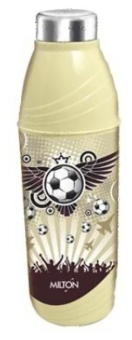

In [75]:
# Mode

img_mode = img_init.filter(ImageFilter.ModeFilter(size=3))
display_img(img_mode)

### c. Compare images

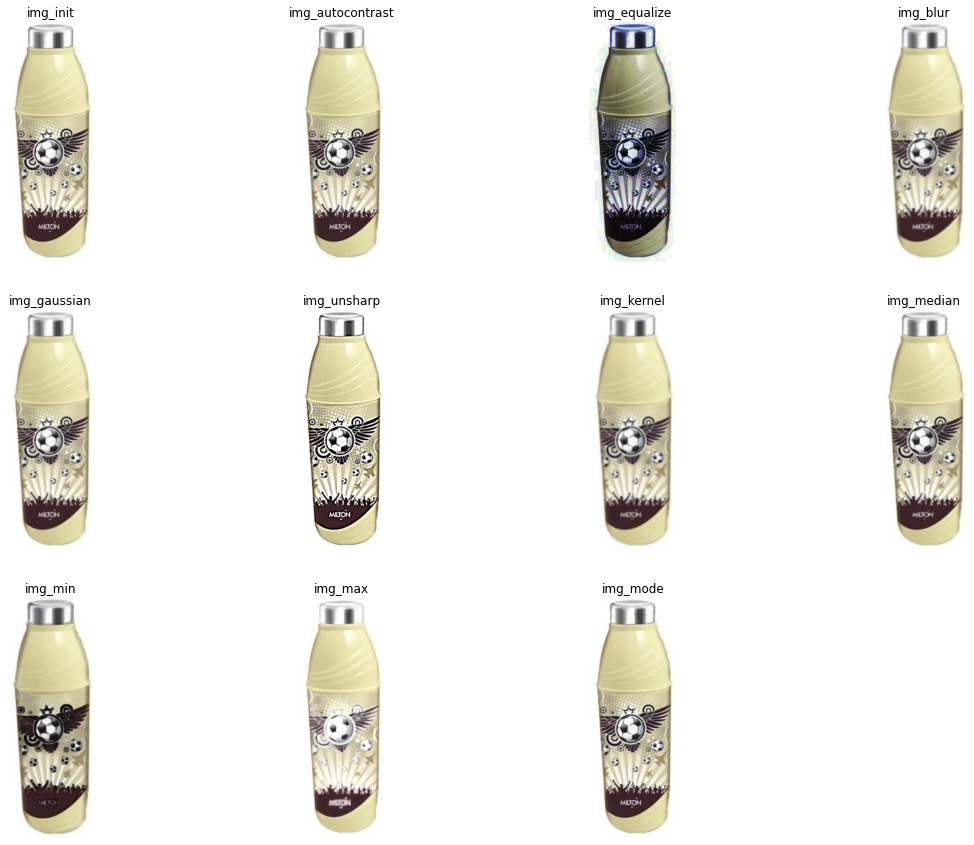

In [76]:
img_list = [img_init, img_autocontrast, img_equalize, 
            img_blur, img_gaussian, img_unsharp, 
            img_kernel, img_median, img_min, img_max, img_mode]

img_names = ['img_init', 'img_autocontrast', 'img_equalize', 
            'img_blur', 'img_gaussian', 'img_unsharp', 
            'img_kernel', 'img_median', 'img_min', 'img_max', 'img_mode']

plt.figure(figsize=(20,15))
i = 1

for img, img_name in zip(img_list, img_names):
    plt.subplot(3, round(len(img_list) / 3), i)
    plt.axis('off')
    plt.title(img_name)
    plt.imshow(img)
    i += 1
plt.show()

We keep this different modification in case we can optimize SIFT descriptors clustering with actual classes

# 2. SIFT <a class="anchor" id="4-bullet"></a>

## I - Determing and displaying SIFT descriptors <a class="anchor" id="5-bullet"></a>

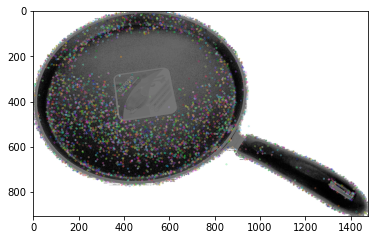

Descriptors :  (4656, 128)

[[ 4.  2.  6. ...  5.  0.  0.]
 [96. 20.  0. ...  9.  2.  0.]
 [55. 16.  0. ...  0.  1.  0.]
 ...
 [12.  0.  0. ...  0.  0.  0.]
 [67. 19.  5. ...  0. 34. 13.]
 [ 0.  5. 27. ...  0.  0.  0.]]


In [26]:
import cv2

sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None) # compute descriptors
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descriptors : ", des.shape)
print()
print(des)

In [27]:
max([max(i) for i in des])

209.0

## II - Image preprocessing with SIFT <a class="anchor" id="6-bullet"></a>

### a. Creating descriptors for each image

In [28]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(data['image'])) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+data['image'].iloc[image_num],0) # convert in gray
    res = cv2.equalizeHist(image) # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints, dtype='object')
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Number of descriptors : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("Computing time SIFT descriptor : ", "%15.2f" % duration1, "seconds")

0
100
200
300
400
500
600
700
800
900
1000

Number of descriptors :  (517351, 128)
Computing time SIFT descriptor :           534.35 seconds


### b. Clustering descriptors

In [29]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Estimated number of clusters : ", k)
print("Creation of",k, "descriptors clusters ...")

# Clustering with MiniBatchKMeans to speed up computing times
kmeans = cluster.MiniBatchKMeans(n_clusters=k, batch_size=2050, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("Computing time KMeans : ", "%15.2f" % duration1, "seconds")

Estimated number of clusters :  719
Creation of 719 descriptors clusters ...
Computing time KMeans :            12.35 seconds


### c. Creating images features

Creating a "bag-of-image" :
- for each descriptor of each image, predicting the cluster with previously trained KMeans
- computing the number of appareances of a given descriptor cluster for each image

Each image has a different number of descriptors, the clustering allows us to obtain features vectors of equal size for each image

In [30]:
# Creation of histograms (features)
temps1=time.time()

# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("Time of histograms creation : ", "%15.2f" % duration1, "seconds")

0
100
200
300
400
500
600
700
800
900
1000
Time of histograms creation :           164.13 seconds


## III - Dimensionality reduction <a class="anchor" id="7-bullet"></a>

### a. PCA dimensionality reduction

In [31]:
# Dimensionality reduction with PCA to speed up and improve performances of T-SNE (keeping 99% variance)

from sklearn import manifold, decomposition

print("Dataset dimensions before PCA reduction : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dataset dimensions after PCA reduction : ", feat_pca.shape)

Dataset dimensions before PCA reduction :  (1050, 719)
Dataset dimensions after PCA reduction :  (1050, 502)


### b. T-SNE dimensionality reduction

In [32]:
# Reduction to 2 T-SNE components for 2D visualization

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["primary_category"]
print(df_tsne.shape)

C:\Users\robin\anaconda3\envs\P6-Openclassrooms\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1050, 3)


## IV - Analysis of similarity <a class="anchor" id="8-bullet"></a>

### a. Visualization of T-SNE for images actual labels

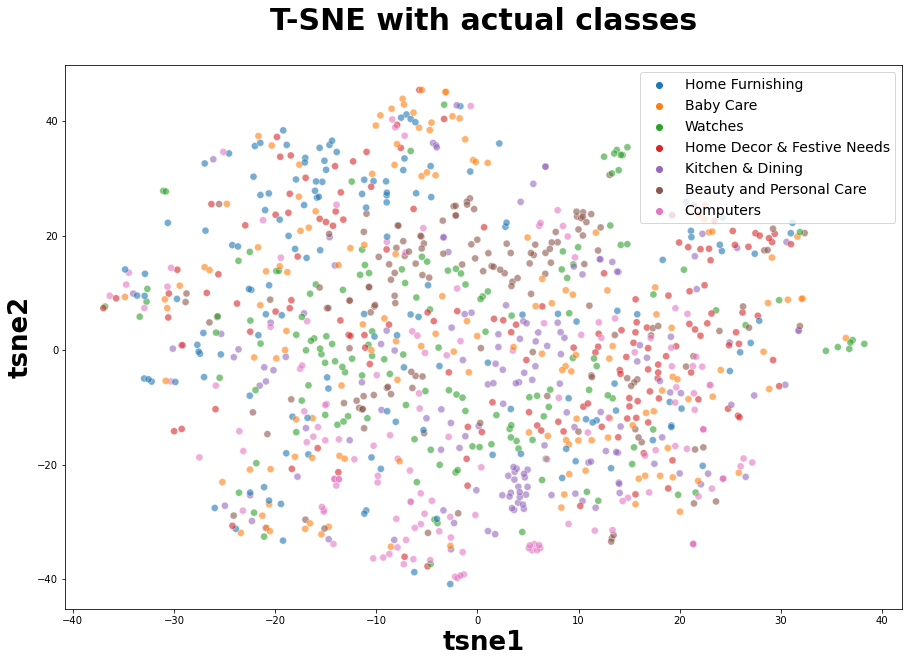

In [33]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('T-SNE with actual classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

### b. Similarity between actual labels and clusters

####  Clustering from T-SNE

In [34]:
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


####  Displaying images depending on clusters and computing ARI between labels and clusters

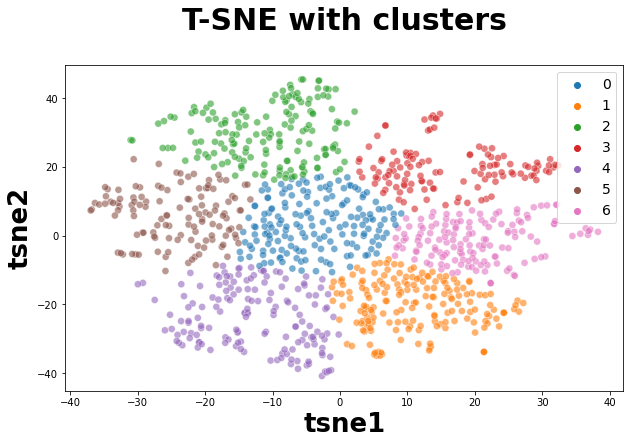

ARI :  0.03868316305674349


In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('T-SNE with clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["primary_category"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

ARI score is very low, a SIFT image classification seems irrealistic. Optimization (number of clusters, filters applied...) probably won't help a lot so we won't try it

#### Analysis per class

In [36]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    169
1    180
2    159
3    121
4    155
5    123
6    143
Name: class, dtype: int64

In [37]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
labels_trans = le.fit_transform(labels)

In [38]:
conf_mat = metrics.confusion_matrix(labels_trans, cls.labels_)
print(conf_mat)

[[17 23 35 14 21 17 23]
 [42 13 25 32 13  9 16]
 [11 33 10  6 54 14 22]
 [18 20 26 21  9 15 41]
 [13 16 49 13 21 28 10]
 [30 50  8 16 17 13 16]
 [38 25  6 19 20 27 15]]


In [39]:
np.argmax(conf_mat, axis=0)

array([1, 5, 4, 1, 2, 4, 3], dtype=int64)

In [40]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [6, 5, 4, 1, 2, 0, 3]
    print ("Clusters correspondance : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels_trans, cls.labels_)
conf_mat = metrics.confusion_matrix(labels_trans, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels_trans, cls_labels_transform))

Clusters correspondance :  [6, 5, 4, 1, 2, 0, 3]
[[17 14 21 23 35 23 17]
 [ 9 32 13 16 25 13 42]
 [14  6 54 22 10 33 11]
 [15 21  9 41 26 20 18]
 [28 13 21 10 49 16 13]
 [13 16 17 16  8 50 30]
 [27 19 20 15  6 25 38]]

              precision    recall  f1-score   support

           0       0.14      0.11      0.12       150
           1       0.26      0.21      0.24       150
           2       0.35      0.36      0.35       150
           3       0.29      0.27      0.28       150
           4       0.31      0.33      0.32       150
           5       0.28      0.33      0.30       150
           6       0.22      0.25      0.24       150

    accuracy                           0.27      1050
   macro avg       0.26      0.27      0.26      1050
weighted avg       0.26      0.27      0.26      1050



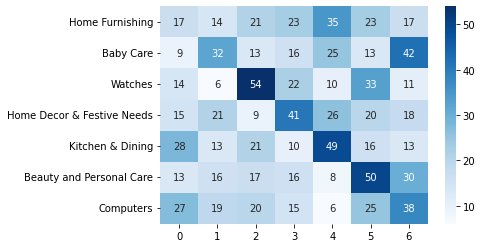

In [41]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in data['primary_category'].unique()],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.show()

# 3. CNN <a class="anchor" id="9-bullet"></a>

## I - Creating features with VGG16 <a class="anchor" id="10-bullet"></a>

In [42]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [43]:
# load pre-trained VGG16 model
model = VGG16()

# remove the output layer (multiclass classifier), to keep only the features (1*4096 vector of features)
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [44]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [45]:
features_vector = []

for image_num in range(len(data['image'])):

    # load an image from file and resizing 224*224*3
    image = load_img(path+data['image'].iloc[image_num], target_size=(224, 224))

    # convert the image pixels to a numpy array
    image = img_to_array(image)

    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    # prepare the image for the VGG model
    image = preprocess_input(image)

    # get extracted features
    features = model.predict(image)
    
    # adding features to features list for each image
    features_vector.append(features[0])

# convert in np.array
im_features_CNN = np.asarray(features_vector)

1/1 [==============================] - 0s 243ms/step


1/1 [==============================] - 0s 267ms/step


1/1 [==============================] - 0s 267ms/step


1/1 [==============================] - 0s 246ms/step


1/1 [==============================] - 0s 256ms/step


C:\Users\robin\anaconda3\envs\P6-Openclassrooms\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 216ms/step


1/1 [==============================] - 0s 251ms/step


1/1 [==============================] - 0s 282ms/step


In [46]:
im_features_CNN.shape

(1050, 4096)

## II - Dimensionality reduction <a class="anchor" id="11-bullet"></a>

### a. PCA dimensionality reduction

In [47]:
# Dimensionality reduction with PCA to speed up and improve performances of T-SNE (keeping 99% variance)

print("Dataset dimensions before PCA reduction : ", im_features_CNN.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features_CNN)
print("Dataset dimensions after PCA reduction : ", feat_pca.shape)

Dataset dimensions before PCA reduction :  (1050, 4096)
Dataset dimensions after PCA reduction :  (1050, 803)


### b. T-SNE dimensionality reduction

In [48]:
# Reduction to 2 T-SNE components for 2D visualization

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["primary_category"]
print(df_tsne.shape)

C:\Users\robin\anaconda3\envs\P6-Openclassrooms\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1050, 3)


## III - Analysis of similarity <a class="anchor" id="12-bullet"></a>

### a. Visualization of T-SNE for images actual labels

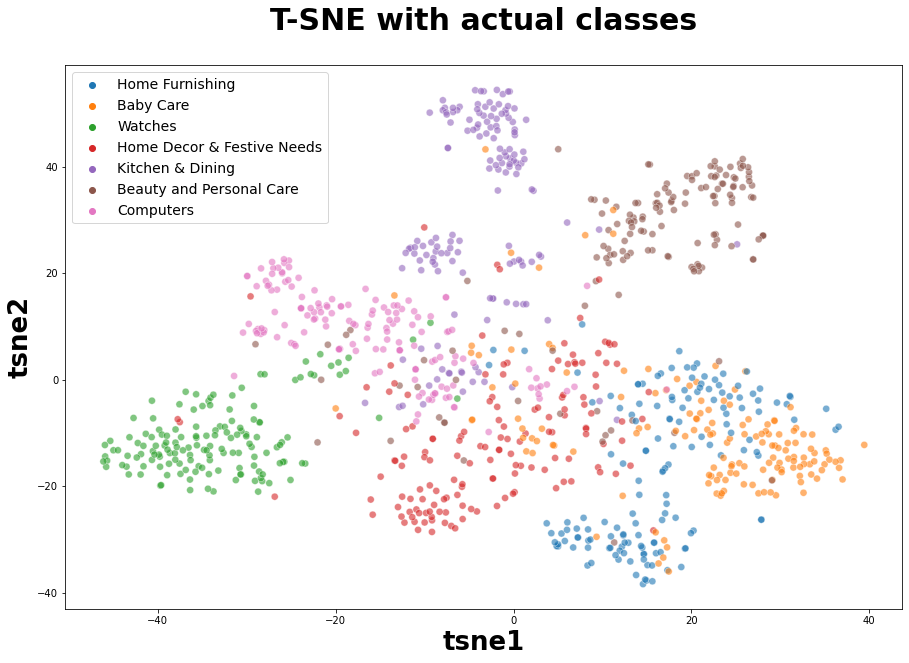

In [49]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('T-SNE with actual classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

### b. Similarity between actual labels and clusters

####  Clustering from T-SNE

In [50]:
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


In [51]:
df_tsne.head()

,tsne1,tsne2,class,cluster
0,8.414428,-30.174078,Home Furnishing,2
1,26.076729,1.607318,Baby Care,4
2,23.655306,-3.925563,Baby Care,4
3,16.711464,-26.308933,Home Furnishing,2
4,19.278324,-31.683746,Home Furnishing,2


####  Displaying images depending on clusters and computing ARI between labels and clusters

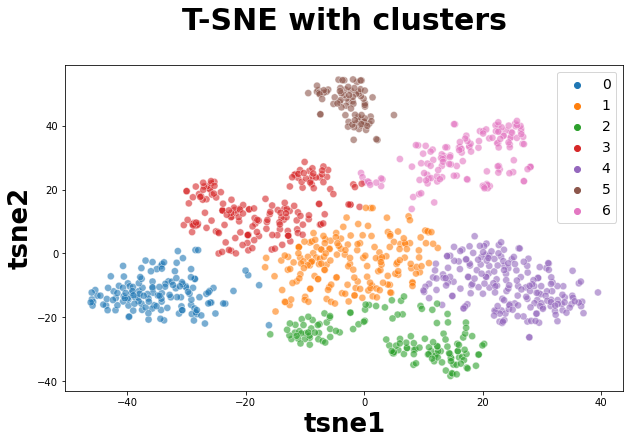

ARI :  0.44795938164737203


In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('T-SNE with clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["primary_category"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

#### Analysis per class

In [53]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    144
1    183
2    137
3    170
4    200
5     80
6    136
Name: class, dtype: int64

In [54]:
le = preprocessing.LabelEncoder()
labels_trans = le.fit_transform(labels)

In [55]:
conf_mat = metrics.confusion_matrix(labels_trans, cls.labels_)
print(conf_mat)

[[  1  22   9   1 111   1   5]
 [  1  16   1   6   7   1 118]
 [  1  38   0 109   1   0   1]
 [  6  74  58   5   6   0   1]
 [  0   7  69   0  74   0   0]
 [  0  24   0  36   1  78  11]
 [135   2   0  13   0   0   0]]


In [56]:
np.argmax(conf_mat, axis=0)

array([6, 3, 4, 2, 0, 5, 1], dtype=int64)

In [57]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Clusters correspondance : ", corresp)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels_trans, cls.labels_)
conf_mat = metrics.confusion_matrix(labels_trans, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels_trans, cls_labels_transform))

Clusters correspondance :  [6 3 4 2 0 5 1]
[[111   5   1  22   9   1   1]
 [  7 118   6  16   1   1   1]
 [  1   1 109  38   0   0   1]
 [  6   1   5  74  58   0   6]
 [ 74   0   0   7  69   0   0]
 [  1  11  36  24   0  78   0]
 [  0   0  13   2   0   0 135]]

              precision    recall  f1-score   support

           0       0.56      0.74      0.63       150
           1       0.87      0.79      0.83       150
           2       0.64      0.73      0.68       150
           3       0.40      0.49      0.44       150
           4       0.50      0.46      0.48       150
           5       0.97      0.52      0.68       150
           6       0.94      0.90      0.92       150

    accuracy                           0.66      1050
   macro avg       0.70      0.66      0.67      1050
weighted avg       0.70      0.66      0.67      1050



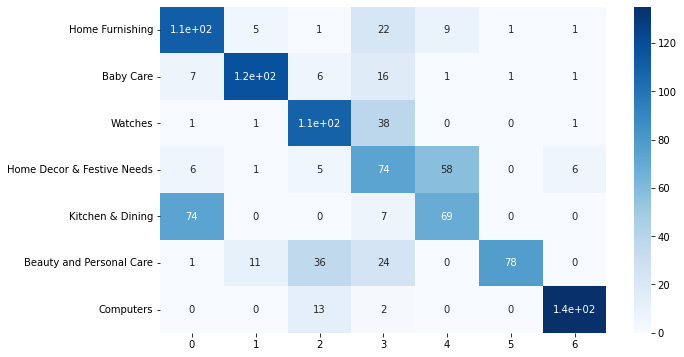

In [58]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in data['primary_category'].unique()],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (10,6))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.show()